## Analýza dat: Seznam a charakteristika Pokémonů

### 0. Příprava

#### 0.1. Načtení knihoven

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

### 0.2. Načtení dat

In [2]:
pokemon = pl.read_csv("pokemonDB_dataset.csv")

In [3]:
pokemon

Pokemon,Type,Species,Height,Weight,Abilities,EV Yield,Catch Rate,Base Friendship,Base Exp,Growth Rate,Egg Groups,Gender,Egg Cycles,HP Base,HP Min,HP Max,Attack Base,Attack Min,Attack Max,Defense Base,Defense Min,Defense Max,Special Attack Base,Special Attack Min,Special Attack Max,Special Defense Base,Special Defense Min,Special Defense Max,Speed Base,Speed Min,Speed Max
str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""Abomasnow""","""Grass, Ice""","""Frost Tree Pok…","""2.2 m (7′03″)""","""135.5 kg (298.…","""1. Snow Warnin…","""1 Attack, 1 Sp…","""60 (7.8% with …","""50 (normal)""","""173""","""Slow""","""Grass, Monster…","""50% male, 50% …","""20 (4,884–5,14…",90,290,384,92,170,311,75,139,273,92,170,311,85,157,295,60,112,240
"""Mega Abomasnow…","""Grass, Ice""","""Frost Tree Pok…","""2.7 m (8′10″)""","""185.0 kg (407.…","""1. Snow Warnin…","""1 Attack, 1 Sp…","""60 (7.8% with …","""50 (normal)""","""208""","""Slow""","""Grass, Monster…","""50% male, 50% …","""20 (4,884–5,14…",90,290,384,132,242,399,105,193,339,132,242,399,105,193,339,30,58,174
"""Abra""","""Psychic""","""Psi Pokémon""","""0.9 m (2′11″)""","""19.5 kg (43.0 …","""1. Synchronize…","""1 Sp. Atk""","""200 (26.1% wit…","""50 (normal)""","""62""","""Medium Slow""","""Human-Like""","""75% male, 25% …","""20 (4,884–5,14…",25,160,254,20,40,152,15,31,141,105,193,339,55,103,229,90,166,306
"""Absol""","""Dark""","""Disaster Pokém…","""1.2 m (3′11″)""","""47.0 kg (103.6…","""1. Pressure, 2…","""2 Attack""","""30 (3.9% with …","""35 (lower than…","""163""","""Medium Slow""","""Field""","""50% male, 50% …","""25 (6,169–6,42…",65,240,334,130,238,394,60,112,240,75,139,273,60,112,240,75,139,273
"""Mega Absol""","""Dark""","""Disaster Pokém…","""1.2 m (3′11″)""","""49.0 kg (108.0…","""1. Magic Bounc…","""2 Attack""","""30 (3.9% with …","""35 (lower than…","""198""","""Medium Slow""","""Field""","""50% male, 50% …","""25 (6,169–6,42…",65,240,334,150,274,438,60,112,240,115,211,361,60,112,240,115,211,361
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Zubat""","""Poison, Flying…","""Bat Pokémon""","""0.8 m (2′07″)""","""7.5 kg (16.5 l…","""1. Inner Focus…","""1 Speed""","""255 (33.3% wit…","""50 (normal)""","""49""","""Medium Fast""","""Flying""","""50% male, 50% …","""15 (3,599–3,85…",40,190,284,45,85,207,35,67,185,30,58,174,40,76,196,55,103,229
"""Zweilous""","""Dark, Dragon""","""Hostile Pokémo…","""1.4 m (4′07″)""","""50.0 kg (110.2…","""1. Hustle""","""2 Attack""","""45 (5.9% with …","""35 (lower than…","""147""","""Slow""","""Dragon""","""50% male, 50% …","""40 (10,024–10,…",72,254,348,85,157,295,70,130,262,65,121,251,70,130,262,58,108,236
"""Zygarde 50% Fo…","""Dragon, Ground…","""Order Pokémon""","""5.0 m (16′05″)…","""305.0 kg (672.…","""1. Aura Break,…","""3 HP""","""3 (0.4% with P…","""0 (lower than …","""270""","""Slow""","""Undiscovered""","""Genderless""","""120 (30,584–30…",108,326,420,100,184,328,121,222,375,81,150,287,95,175,317,95,175,317


### 1. Lorenzova křivka váhy a výšky

In [3]:
# Zpracování sloupců obsahující váhu a výšku do seznamu
dataset_wh = pokemon.with_columns( 
    pl.col("Height")
    .str.split(" ")
    .list.get(0)
    .cast(pl.Float64)
    .name.keep()
).with_columns(
    pl.col("Weight")
    .str.split(" ")
    .list.get(0)
    .cast(pl.Float64, strict=False)
    .name.keep()
)

# Získání dat ve formátu ndarray
data_weight = dataset_wh.filter(pl.col("Weight").is_not_null()).to_series(4).sort().to_numpy() # Váha obsahuje None hodnoty, nutno je odfiltrovat
data_height = dataset_wh.to_series(3).sort().to_numpy()

dataset_wh.select("Pokemon", "Weight").sort("Weight")

Pokemon,Weight
str,f64
"""Eternatus Eter…",null
"""Cosmog""",0.1
"""Flabébé""",0.1
"""Gastly""",0.1
"""Gimmighoul Roa…",0.1
…,…
"""Eternatus""",950.0
"""Groudon""",950.0
"""Primal Groudon…",999.7


In [4]:
dw_rate = data_weight / sum(data_weight)
dh_rate = data_height / sum(data_height)

dw_cumsum = dw_rate.cumsum()
dh_cumsum = dh_rate.cumsum()

print(dw_cumsum)
print(dh_cumsum)

[1.11489432e-06 2.22978864e-06 3.34468296e-06 ... 9.77704343e-01
 9.88852172e-01 1.00000000e+00]
[5.97121873e-05 1.19424375e-04 1.79136562e-04 ... 9.28345375e-01
 9.40287813e-01 1.00000000e+00]


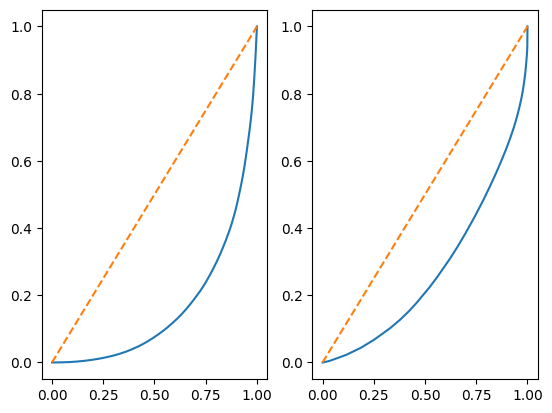

In [15]:
fig, axes = plt.subplots(1,2)

# Data na vytvoření x osy
scale_dw = np.array([(x + 1)/len(dw_cumsum) for x in range(len(dw_cumsum))])
scale_dh = np.array([(x + 1)/len(dh_cumsum) for x in range(len(dh_cumsum))])

axes[0].plot(scale_dw, dw_cumsum)
axes[0].plot([0,1], [0,1], linestyle="dashed")
axes[1].plot(scale_dh, dh_cumsum)
axes[1].plot([0,1], [0,1], linestyle="dashed")

plt.show()

In [8]:
def weight_comp(dataframe:pl.DataFrame) -> None: # Funkce, která porovná nejtěžšího pokémona s nejlehčími
    sum = 0
    index = 0
    target = dataframe.row(-1, named=True)
    while sum < target["Weight"]:
        current = dataframe.row(index, named=True)
        sum += current["Weight"]
        index += 1

    index -= 1
    idk = index/dataframe.__len__() * 100
    print(f"{target["Pokemon"]} ({target["Weight"]} kg) is heavier than {index} lightest pokemon together. ({ idk - (idk % 0.01)}%)")
 
weight_comp(dataset_wh.select("Pokemon", "Weight").filter(pl.col("Weight").is_not_null()).sort("Weight"))

Cosmoem (999.9 kg) is heavier than 277 lightest pokemon together. (22.81%)


In [9]:
def height_comp(dataframe:pl.DataFrame) -> None:
    sum = 0
    index = 0
    target = dataframe.row(-1, named=True)
    while sum < target["Height"]:
        current = dataframe.row(index, named=True)
        sum += current["Height"]
        index += 1

    index -= 1
    idk = index/dataframe.__len__() * 100
    print(f"{target["Pokemon"]} ({target["Height"]} m) is higher than {index} shortest pokemon together. ({ idk - (idk % 0.01)}%)")
 
height_comp(dataset_wh.select("Pokemon", "Height").filter(pl.col("Height").is_not_null()).sort("Height"))

Eternatus Eternamax (100.0 m) is higher than 280 shortest pokemon together. (23.04%)


### 2. Histogram typů

In [10]:
dataset_types = pokemon.with_columns(
    pl.col("Type")
    .str.split(", ")
    .name.keep()
)

In [11]:
types_detailed = dataset_types.explode("Type")
type_array = types_detailed.to_series(1).to_numpy()
type_number = types_detailed.to_series(1).unique().to_numpy()
type_count = dataset_types.with_columns(
    pl.col("Type")
    .list.len()
    .alias("Type count")
).to_series(-1).to_numpy()

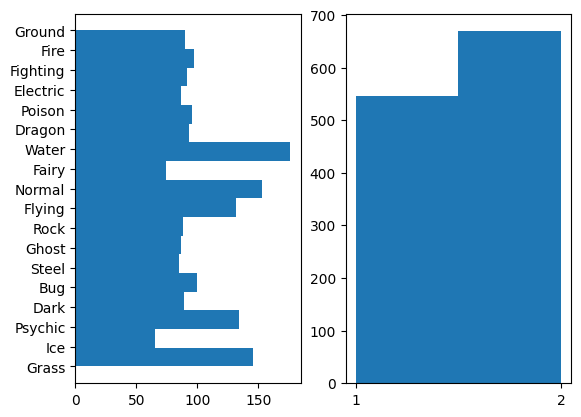

In [12]:
fig, axes = plt.subplots(1,2)

axes[0].hist(type_array, bins=len(type_number), orientation="horizontal")
axes[1].hist(type_count, bins=2)
axes[1].set_xticks([1,2])

plt.show()

Z grafu lze vidět, že většina Pokémonů má dva typy a nejčastější typ Pokémona je vodní (Water). Naopak nejvzácnější typ je vílí (Fairy).

### 3. Poměr váha - rychlost

In [12]:
data_speed_min = dataset_wh.filter(pl.col("Weight").is_not_null()).sort(pl.col("Weight")).to_series(-2).to_numpy()
data_speed_max = dataset_wh.filter(pl.col("Weight").is_not_null()).sort(pl.col("Weight")).to_series(-1).to_numpy()

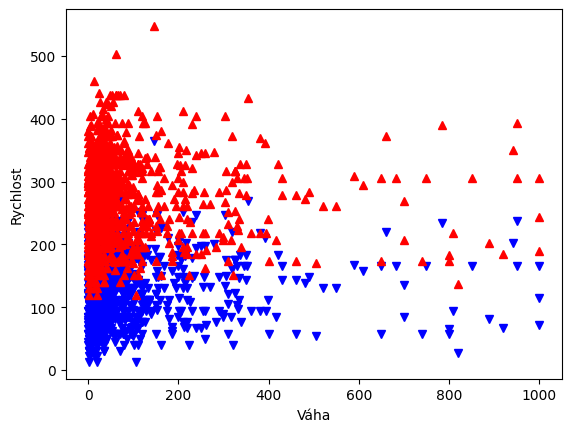

In [13]:
plt.plot(data_weight, data_speed_min, 'bv')
plt.plot(data_weight, data_speed_max, 'r^')

plt.xlabel("Váha")
plt.ylabel("Rychlost")

plt.show()

Na grafu lze vidět, že mezi rychlostí a váhou není žádná korelace. 

### 4. Poměr pohlaví

In [44]:
gender = pokemon.to_series(pokemon.get_column_index("Gender"))
male_female = gender.str.replace_all("[a-zA-Z%\" ]", "").str.split(",").cast(pl.List(pl.Float64))
male_female = male_female.filter(male_female.list.len() == 2)

mafe_list = male_female.to_list()

male_rates = 0
female_rates = 0
for pair in mafe_list:
    male_rates += (pair[0] / 100)
    female_rates += (pair[1] / 100)

male_rates /= len(mafe_list)
female_rates /= len(mafe_list)

male_rates *= len(mafe_list) / len(pokemon)
female_rates *= len(mafe_list) / len(pokemon)

print(male_rates, female_rates)

0.4577160493827161 0.38014403292181076


In [54]:
genderless_count = gender.filter((gender == "Genderless") | (gender == "—")).__len__()
genderless_count

genderless_rate = genderless_count / len(pokemon)
genderless_rate

0.16213991769547326

In [55]:
male_rates + female_rates + genderless_rate

1.0

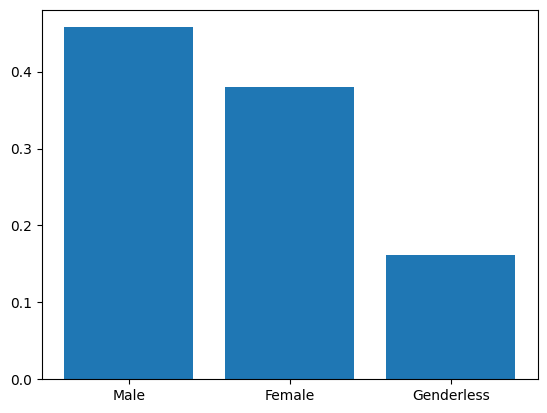

In [57]:
plt.bar(["Male", "Female", "Genderless"], [male_rates, female_rates, genderless_rate])

plt.show()

Z grafu lze vidět, že většina Pokémonů jsou samci.

### 5. Distribuce statistik

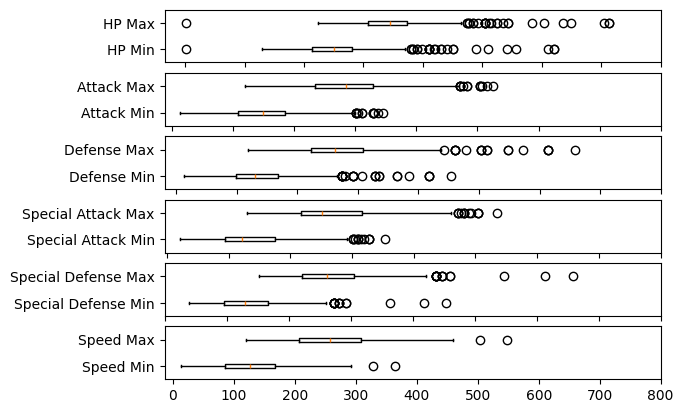

In [84]:
startPoint = pokemon.get_column_index("HP Min")

for count, middle_column in enumerate(range(startPoint, pokemon.width, 3)):
    data = [pokemon.to_series(middle_column).to_list(), pokemon.to_series(middle_column + 1).to_list()]
    names = [pokemon.columns[middle_column], pokemon.columns[middle_column + 1]]
    plt.subplot(6,1, count + 1)
    plt.boxplot(data, labels=names, vert=False)

    ticks = range(0, 900, 100)
    if count < 5:
        tick_names = [" "] * len(ticks)
    else:
        tick_names = ticks

    plt.xticks(ticks, tick_names)

plt.show()

Z grafu lze vyčíst, že většina vlastností má (mimo výjimek) přibližně podobné rozložení dat, mimo HP, které je posunuté doprava. HP má také nejvíce výjimek.